In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline

In [4]:
class Perceptron:
    
    def __init__(self, eta=0.10, epochs=50, is_verbose = False):
        
        self.eta = eta
        self.epochs = epochs
        self.is_verbose = is_verbose
        self.list_of_errors = []
        
    
    def predict(self, x):
        
        ones = np.ones((x.shape[0],1))
        x_1 = np.append(x.copy(), ones, axis=1)
        #activation = self.get_activation(x_1)
        #y_pred = np.where(activation >0, 1, -1)
        #return y_pred
        return np.where(self.get_activation(x_1) > 0, 1, -1)
        
    
    def get_activation(self, x):
        
        activation = np.dot(x, self.w)
        return activation
     
    
    def fit(self, X, y):
        
        self.list_of_errors = []
        
        ones = np.ones((X.shape[0], 1))
        X_1 = np.append(X.copy(), ones, axis=1)
 
        self.w = np.random.rand(X_1.shape[1])
        
        for e in range(self.epochs):
 
            error = 0
            
            activation = self.get_activation(X_1)
            delta_w = self.eta * np.dot((y - activation), X_1)
            self.w += delta_w
                
            error = np.square(y - activation).sum()/2.0
                
            self.list_of_errors.append(error)
            
            if(self.is_verbose):
                print("Epoch: {}, weights: {}, error {}".format(
                        e, self.w, error))

In [5]:
X = np.array([
    [2., 4.,  20.],  # 2*2 - 4*4 + 20 =   8 > 0
    [4., 3., -10.],  # 2*4 - 4*3 - 10 = -14 < 0
    [5., 6.,  13.],  # 2*5 - 4*6 + 13 =  -1 < 0
    [5., 4.,   8.],  # 2*5 - 4*4 + 8 =    2 > 0
    [3., 4.,   5.],  # 2*3 - 4*4 + 5 =   -5 < 0 
])

In [6]:
y = np.array([1, -1, -1, 1, -1])

In [7]:
perceptron = Perceptron(eta=0.0001, epochs=100, is_verbose=True)

In [8]:
perceptron.fit(X, y)

Epoch: 0, weights: [0.38913994 0.36868788 0.44131094 0.43956335], error 187.06174067256808
Epoch: 1, weights: [0.3764116  0.35270145 0.39697108 0.43614124], error 159.79628798462988
Epoch: 2, weights: [0.36445347 0.33777338 0.356445   0.43293822], error 136.8260575271529
Epoch: 3, weights: [0.35320462 0.32381839 0.31941453 0.42993676], error 117.46797382509908
Epoch: 4, weights: [0.34260914 0.31075827 0.28558795 0.42712079], error 101.14772450971805
Epoch: 5, weights: [0.33261573 0.29852128 0.25469779 0.42447557], error 87.38243973636719
Epoch: 6, weights: [0.32317731 0.28704163 0.22649881 0.42198755], error 75.76612996954279
Epoch: 7, weights: [0.31425071 0.27625893 0.20076617 0.41964434], error 65.95744285374221
Epoch: 8, weights: [0.30579629 0.26611783 0.17729371 0.41743454], error 57.669369846176195
Epoch: 9, weights: [0.29777768 0.2565675  0.1558924  0.4153477 ], error 50.66059210373956
Epoch: 10, weights: [0.29016151 0.24756135 0.13638896 0.41337425], error 44.728204566281086
Epo

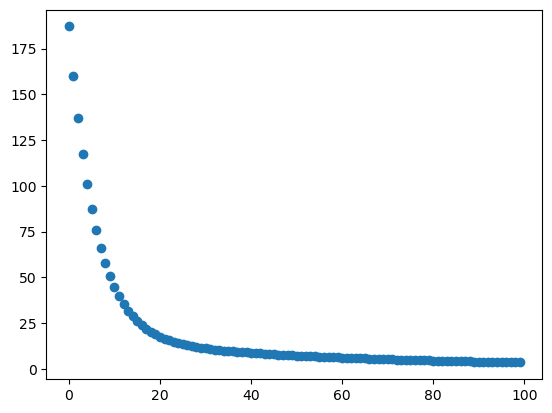

In [9]:
plt.scatter(range(perceptron.epochs), perceptron.list_of_errors)

In [10]:
df = pd.read_csv('../ml_data/iris.data', header=None)

In [11]:
df = df.iloc[:100, :].copy()

In [12]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
df[4] = df[4].apply(lambda x:1 if x =='Iris-setosa' else -1)

In [14]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [15]:
X = df.iloc[0:100, :-1].values

In [17]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [18]:
y = df[4].values

In [19]:
y

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [27]:
p = Perceptron(eta = 0.0001, epochs=1000) 

In [28]:
p.fit(X_train, y_train) 

In [29]:
y_pred = p.predict(X_test)

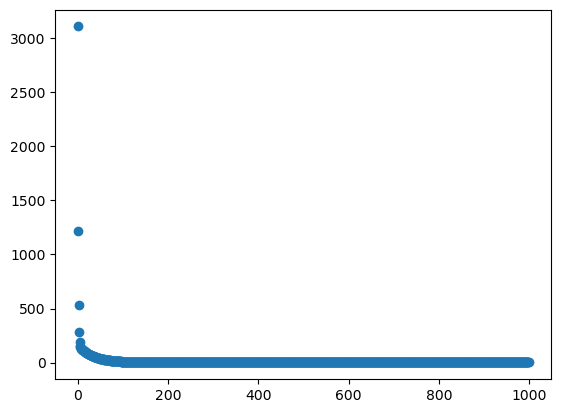

In [30]:
plt.scatter(range(p.epochs), p.list_of_errors)